In [138]:
# DNN 練習用 digit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# scikit-learn ライブラリの読み込み
from sklearn import datasets

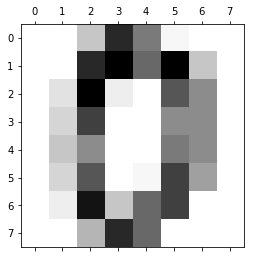

In [2]:
# 手書き文字セットを読み込む
digits = datasets.load_digits()
# どのようなデータか、確認してみる
plt.matshow(digits.images[0], cmap="Greys")
plt.show()

In [25]:
## 数ごとに並べる  データセットの数揃ってないやん...
y_count=np.zeros(10);
for i in range(len(y)):
    y_count[y[i]]+=1
y_count

array([ 178.,  182.,  177.,  183.,  181.,  182.,  181.,  179.,  174.,  180.])

In [3]:
# 画像データを配列にしたもの(numpy.ndarray型)
X = digits.data
# 画像データに対する数字(numpy.ndarray型)。ラベルと言う
y = digits.target
# 訓練データとテストデータに分ける
# 訓練データ ：偶数行
X_train, y_train = X[0::2], y[0::2]
# テストデータ：奇数行
X_test, y_test = X[1::2], y[1::2]

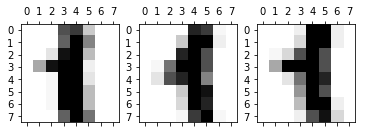

In [245]:
# 叩き台 練習
plot_num = 1;  # 表示する番号
plot_sum = 3;  # 表示する個数

fig = plt.figure()
for i1 in range(plot_sum):
    Xreshape = np.reshape(X[plot_num + i1*10],(8,8))
    ax1 = fig.add_subplot(1, plot_sum, i1+1)
    ax1.matshow(Xreshape, cmap="Greys")
plt.show()


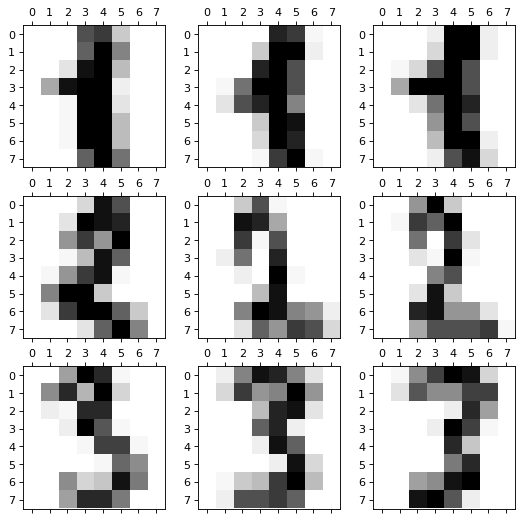

In [261]:
# 叩き台 練習2
plot_num = 1;  # 表示する番号
plot_sum1 = 3;  # 表示する個数 縦軸
plot_sum2 = 3;  # 表示する個数 横軸

fig = plt.figure(figsize=(8, 8), dpi=80)
for i1 in range(plot_sum1):
    for i2 in range(plot_sum2):
        Xreshape = np.reshape(X[plot_num + i2*10 + i1],(8,8))
        ax1 = fig.add_subplot(plot_sum1, plot_sum2, i1*plot_sum2+i2+1)
        ax1.matshow(Xreshape, cmap="Greys")
# plt.savefig('fig/fig_sample_digits.jpg')
plt.show()


In [31]:
# 学習器の作成。SVMというアルゴリズムを選択
from sklearn import svm
clf_svm = svm.SVC(gamma=0.001)
# 訓練データとラベルで学習
clf_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [253]:
from sklearn.metrics import classification_report
# テストデータで試した正解率を返す
accuracy = clf_svm.score(X_test, y_test)
print("正解率:"+str(accuracy))
# 学習済モデルを使ってテストデータを分類した結果を返す
predicted = clf_svm.predict(X_test)
# 詳しいレポート
# precision(適合率): 選択した正解/選択した集合
# recall(再現率) : 選択した正解/全体の正解
# F-score(F値) : 適合率と再現率はトレードオフの関係にあるため
print("classification report")
print(classification_report(y_test, predicted))

正解率:0.986636971047
classification report
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.98      1.00      0.99        89
          2       1.00      1.00      1.00        91
          3       1.00      0.98      0.99        93
          4       0.99      1.00      0.99        88
          5       0.98      0.97      0.97        91
          6       0.99      1.00      0.99        90
          7       0.99      1.00      0.99        91
          8       0.97      0.97      0.97        86
          9       0.98      0.97      0.97        91

avg / total       0.99      0.99      0.99       898



In [201]:
###################  plot用  ################### 
# SVM 結果 plot 0,1,2のみ
#分類結果を図示する
from mlxtend.plotting import plot_decision_regions 
# conda install -c conda-forge mlxtend #Anaconda install
plot_num=7

clf1 = svm.SVC(gamma=0.1)
X_train1=np.concatenate([X[plot_num::10],X[plot_num+1::10],X[plot_num+2::10]])
y_train1=np.concatenate([y[plot_num::10],y[plot_num+1::10],y[plot_num+2::10]])
clf1.fit(X_train1, y_train1)
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = plot_decision_regions(X_train1, y_train1, clf=clf1,res=0.02,legend=2)
# label変更用
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['7', '8', '9'], 
           framealpha=0.5, scatterpoints=1)
plt.title('SVM on digits')
# plt.savefig('fig/fig_svm_digits_7to9.jpg')
plt.show()

ImportError: No module named mlxtend.plotting

In [256]:
# NN
from sklearn import neural_network
clf_nn = neural_network.MLPClassifier(activation="relu", alpha=0.0001) # clfはclassificationの略語
# activation: 活性化関数 alpha: L2正則化パラメータ
# 訓練データとラベルで学習
clf_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [257]:
from sklearn.metrics import classification_report
# テストデータで試した正解率を返す
accuracy = clf_nn.score(X_test, y_test)
print(accuracy)
print("正解率"+str(accuracy))
# 学習済モデルを使ってテストデータを分類した結果を返す
predicted = clf_nn.predict(X_test)
# 詳しいレポート
# precision(適合率): 選択した正解/選択した集合
# recall(再現率) : 選択した正解/全体の正解
# F-score(F値) : 適合率と再現率はトレードオフの関係にあるため
print("classification report")
print(classification_report(y_test, predicted))

0.955456570156
正解率0.955456570156
classification report
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.92      0.96      0.94        89
          2       0.98      1.00      0.99        91
          3       0.97      0.94      0.95        93
          4       0.90      0.99      0.94        88
          5       0.99      0.97      0.98        91
          6       1.00      0.97      0.98        90
          7       0.98      0.99      0.98        91
          8       0.88      0.88      0.88        86
          9       0.94      0.88      0.91        91

avg / total       0.96      0.96      0.96       898



In [258]:
## 学習データ
# 保存
from sklearn.externals import joblib
# joblib.dump(clf_nn,"/Documents/tada/GitHub/Hello-World/Hello-Python/MLearn/sklearn_digits/ld/digits_nn190213.pkl")
joblib.dump(clf_nn,"ld/digits_nn190213.pkl")
# 読み込み
# clf_nn=joblib.load("~/Documents/tada/GitHub/Hello-World/Hello-Python/MLearn/sklearn_digits/ld/digits_nn190213.pkl")
clf_nn=joblib.load("ld/digits_nn190213.pkl")

In [259]:
## 画像判定
from sklearn.externals import joblib
import cv2
def predict_digit(filename):
    # 学習済みデータを読み込む
    clf = joblib.load("ld/digits_nn190213.pkl")
    # 自分で用意した手書きの画像ファイルを読み込む
    my_img = cv2.imread(filename)
    # 画像データを学習済みデータに合わせる
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8),interpolation = cv2.INTER_AREA)
    # interpolation = cv2.INTER_AREA 平均
    my_img = 15 - my_img // 16 # 白黒反転する
    # 二次元を一次元に変換
    my_img = my_img.reshape((-1, 64))
    # データ予測する
    res = clf.predict(my_img)
    return res[0]


fn="mypng/digit_3_3.png"

# 画像ファイルを指定して実行
n = predict_digit(fn)
print("my.png = " + str(n))


my.png = 4


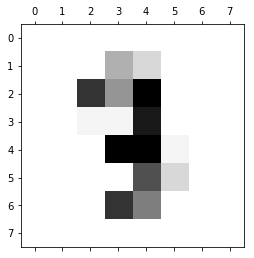

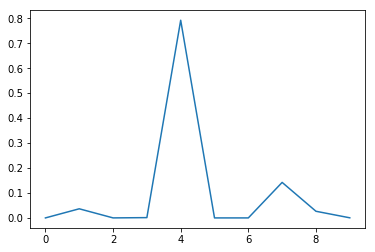

In [252]:
# 判定に入れたデータの確認
my_img = cv2.imread(fn)
# 画像データを学習済みデータに合わせる
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
my_img = cv2.resize(my_img, (8, 8),interpolation = cv2.INTER_AREA)
my_img = 15 - my_img // 16 # 白黒反転する

# plt.matshow(digits.images[0], cmap="Greys")
plt.matshow(my_img,cmap="Greys")
plt.show()

# 二次元を一次元に変換
my_img = my_img.reshape((-1, 64))
# データ予測する
pred_proba = clf.predict_proba(my_img)
# plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.plot(np.arange(0,10),pred_proba[0,:])
plt.show()

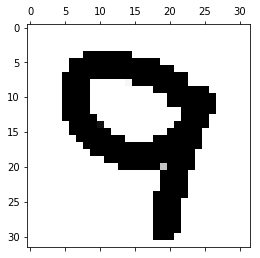

In [191]:
## サイズ大きくすべき?
my_img = cv2.imread(fn)
# 画像データを学習済みデータに合わせる
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
my_img = cv2.resize(my_img, (32, 32))
my_img = 15 - my_img // 16 # 白黒反転する
# my_img.shape
plt.matshow(my_img,cmap="Greys")
plt.show()